<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Melany López, Steven Barragan

Fecha: 13/08/2022

## Importación de librerias necesarias

In [17]:
#Importamos las librerías correspondientes
# Importamos la librería ImageDataGenerator,
from keras.preprocessing.image import ImageDataGenerator
# Importamos la librería  array_to_img, img_to_array, load_img
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
# Importamos la librería glob
import glob
# Importamos la libreria numpy
import numpy as np
# Importamos la librería plt
import matplotlib.pyplot as plt
# Importamos la librería os
import os
# Configuramos el ambiente
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#Importamos la libreria shutil
import shutil
#Importamos la libreria random
import random
# Importamos la librería io 
from skimage import io
# Importamos open cv
import cv2
# Importamos remove de la libreria rembg
from rembg import remove
# Importamos Image de la libreria PIL
from PIL import Image
# Importamos train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
# Importamos keras de la libreria tensorflow
from tensorflow import keras
# Importamos Sequential de la libreria keras
from keras.models import Sequential
# Importamos Conv2D,MaxPooling2D,Dense,Flatten,Dropout de la libreria keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# Importamos BatchNormalization de la libreria tensorflow
from tensorflow.keras.layers import BatchNormalization
# Importamos la libreria tensorflow
import tensorflow as tf
# Importamos la libreria visualkeras
import visualkeras
# Importamos early stopping
from keras.callbacks import EarlyStopping
# Importamos PCA 
from sklearn.decomposition import PCA
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

## Descripción del dataset

El presente dataset incorpora fotos de los estudiantes de sexto semestre de la carrera de Ingenieria en tecnologias de la información, cuyo objetivo es la aplicación de las mismas para realizar un reconocimiento facial identificando el nombre de cada uno de los participantes.

Dentro del conjunto de imagenes podemos identificar que se centran en el uso de los formatos jpg, png, jpeg. El esquema de colores utilizado por las imagenes es RGB. Sus dimenciones preestablecidas se encuentran en 5 x 5 cm, siendo imagenes que enfocan los 3 diferentes perfiles del rostro de una persona.

Las clases objetivo con las que dispone el dataset son las siguientes:
'Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeño', 'JhonZambrano', 'JordanEspinosa', 'JorgeBorrero', 'JoseRuiz', 'LeonardoBorja', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan'

## Descripción del problema
Este dataset contiene varios parámetros/características en donde se requiere realizar un reconocimiento facial de una persona por medio de la predicción basada en imágenes. Cabe mencionar que por cada persona se extrajo un total de tres imagenes de los perfiles del rostro, para el respectivo entrenamiento del modelo que consta del lado frontal, lado derecho y lado izquierdo del rostro de la persona.

## Carga del dataset

In [4]:
# Definimos la ruta del dataset
folder = 'C:\IAU3/PROYECTOIA-U3/'

In [5]:
#Se observa los nombres de las carpetas
nombres = os.listdir(folder)
# Imprimimos los nombres
print(nombres)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedenio', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


## Impresión del dataset

- Dimensiones de la imagen:
(192, 192, 3)


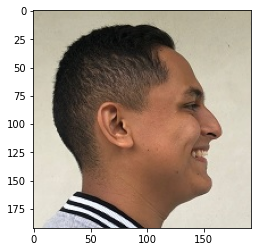

- Dimensiones de la imagen:
(192, 192, 3)


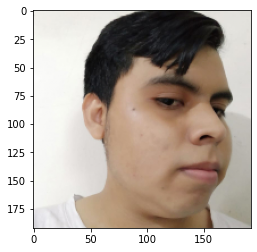

- Dimensiones de la imagen:
(192, 192, 3)


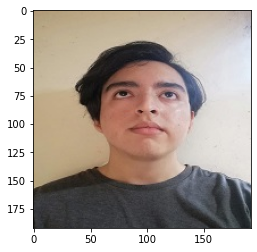

- Dimensiones de la imagen:
(192, 192, 3)


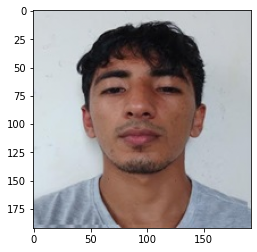

- Dimensiones de la imagen:
(192, 192, 3)


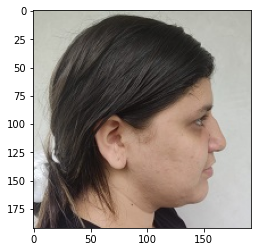

- Dimensiones de la imagen:
(192, 192, 3)


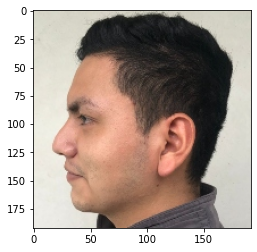

- Dimensiones de la imagen:
(192, 192, 3)


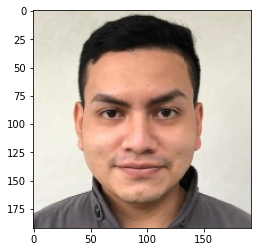

- Dimensiones de la imagen:
(192, 192, 3)


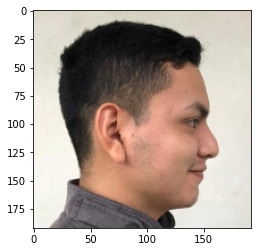

- Dimensiones de la imagen:
(4608, 2128, 3)


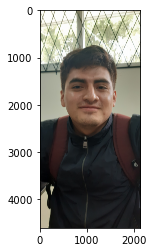

In [7]:
image = []
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = folder+"/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        image.append(io.imread(folder + "/" + class_name +'/'+ element)/255.0) # imread lee las imagenes con los pixeles codificados como enteros 
        # en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
        
for i in range(9):
    print("- Dimensiones de la imagen:")
    ran = random.randint(0, len(image) - 1)
    print(image[ran].shape)
    plt.imshow(image[ran],vmin=0,vmax=1)
    plt.show()

## Data Augmentation

In [6]:
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = folder + "/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        # Imprimimos la acción realizada
        print("Copying Image - {} in Fotos_Augmented/{}".format(element, class_name))
        # Definimos la ruta de origen de los elementos
        src = os.path.join(folder + "/" + class_name, element) # origen
        # Definimos la ruta de destino de los elementos
        dst = os.path.join("C:\IAU3/Fotos_Augmented/" + class_name, element) 
        
        
        # Realizamos la copia de las fotos
        shutil.copy(src, dst)

Copying Image - L00376418_1.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00376418_2.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00376418_3.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00376418_4.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00376418_5.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00376418_6.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00376418_7.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00376418_8.jpg in Fotos_Augmented/Ariel Chabla
Copying Image - L00385770_1.png in Fotos_Augmented/ArroboMercy
Copying Image - L00385770_2.png in Fotos_Augmented/ArroboMercy
Copying Image - L00385770_3.png in Fotos_Augmented/ArroboMercy
Copying Image - L00385770_4.png in Fotos_Augmented/ArroboMercy
Copying Image - L00385770_5.png in Fotos_Augmented/ArroboMercy
Copying Image - L00385770_6.png in Fotos_Augmented/ArroboMercy
Copying Image - L00385770_7.png in Fotos_Augmented/ArroboMercy
Copying Image - L00385770_8.png in Fotos_Augmen

Copying Image - L00392999_5.jpg in Fotos_Augmented/MelanyLopez
Copying Image - L00392999_6.jpg in Fotos_Augmented/MelanyLopez
Copying Image - L00392999_7.jpg in Fotos_Augmented/MelanyLopez
Copying Image - L00392999_8.jpg in Fotos_Augmented/MelanyLopez
Copying Image - L00392999_9.jpg in Fotos_Augmented/MelanyLopez
Copying Image - L00073392_1.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_2.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_3.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_4.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_5.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_6.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_7.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_8.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00073392_9.jpg in Fotos_Augmented/MosqueraLucy
Copying Image - L00380424_1.jpg in Fotos_Augmented/Nataly Acosta
Copying Image - L00380424_2.jpg in Fotos_Aug

In [8]:
# Definimos las caracteristicas de las imagenes
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

In [9]:
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = "C:\IAU3/Fotos_Augmented/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        # Cargamos la imagen
        img = load_img(cur_path+"/"+element)
        # Creamos un array Numpy con formato (3, 150, 150)
        x = img_to_array(img)
        #Reescalamos la imagen
        x = cv2.resize(x, (192, 192))
        # Realisamos un remodelado de las imagen
        x = x.reshape((1,) + x.shape)
        # Inicializamos la variable i
        i = 0
        # Deginimos un bucle que almacenara las nuevas fotos creadas
        for batch in datagen.flow(x, batch_size=1,
                save_to_dir="C:\IAU3/Fotos_Augmented/"+class_name, 
                save_prefix= class_name, 
                save_format='jpg'):
            # Aumentamos el contador
            i += 1
            # Condición de detención del bucle
            if i == 10:
                #Fin del bucle
                break

## Redimención de las Imagenes

In [10]:
# Definimos las caracteristicas de las imagenes
datagenResize = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0,
        height_shift_range=0,
        rescale=1./255,
        shear_range=0,
        zoom_range=0,
        horizontal_flip=False,
        )

In [11]:
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = "C:\IAU3/Fotos_Augmented/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        # Cargamos la imagen
        img = load_img(cur_path+"/"+element)
        # Creamos un array Numpy con forma(3, 150, 150)
        x = img_to_array(img)
        #Reescalamos la imagen
        x = cv2.resize(x, (192, 192))
        # Realisamos un remodelado de las imagen
        x = x.reshape((1,) + x.shape)
        # Inicializamos la variable i
        i = 0
        # Deginimos un bucle que almacenara las nuevas fotos creadas
        for batch in datagenResize.flow(x, batch_size=1,
                save_to_dir="C:\IAU3/Fotos_Resize/"+class_name, 
                save_prefix= class_name, 
                save_format='jpg'):
            # Aumentamos el contador
            i += 1
            # Condición de detención del bucle
            if i == 1:
                #Fin del bucle
                break

## Filtro NLM para eliminación de ruido de imágenes

In [12]:
# Establecemos la ruta de las imagenes
os.chdir(r"C:\IAU3")
# Asignamos la ruta de las fotos
images_path = "./Fotos_Resize/"
# Almacenamos los nombres de la clases
class_names = os.listdir(images_path)
# Ordenamos la lista
class_names.sort()
# Mostramos las clases
print(class_names)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedenio', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


In [13]:
# Definimos un bucle que recorra todas las clases
for class_name in class_names:
    # Obtenemos la ruta de la clase
    cur_path = images_path + "/" + class_name
    # Asignamos la etiqueta de la clase
    cur_label = class_name
    # Inicializamos el contador
    i = 1

    # Definimos un bucle for que recorra todos los elementos
    for file in glob.glob(cur_path + "/*"):
        #Imprimimos un mensaje con la acción ejecutada
        print("Processing Image - {} in {}".format(i, cur_label))
        # Leemos la ruta de la imagen
        image = cv2.imread(file)
        # Eliminamos el ruido de las imagenes
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        # Obtenemos el esquema de color
        b,g,r = cv2.split(dst)
        # Establecemos el esquema de color
        rgb_dst = cv2.merge([r,g,b])
        # Guardamos la imagen
        save_path = './Fotos_SinRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # Mostramos el ciclo
        i += 1

Processing Image - 1 in Ariel Chabla
Processing Image - 2 in Ariel Chabla
Processing Image - 3 in Ariel Chabla
Processing Image - 4 in Ariel Chabla
Processing Image - 5 in Ariel Chabla
Processing Image - 6 in Ariel Chabla
Processing Image - 7 in Ariel Chabla
Processing Image - 8 in Ariel Chabla
Processing Image - 9 in Ariel Chabla
Processing Image - 10 in Ariel Chabla
Processing Image - 11 in Ariel Chabla
Processing Image - 12 in Ariel Chabla
Processing Image - 13 in Ariel Chabla
Processing Image - 14 in Ariel Chabla
Processing Image - 15 in Ariel Chabla
Processing Image - 16 in Ariel Chabla
Processing Image - 17 in Ariel Chabla
Processing Image - 18 in Ariel Chabla
Processing Image - 19 in Ariel Chabla
Processing Image - 20 in Ariel Chabla
Processing Image - 21 in Ariel Chabla
Processing Image - 22 in Ariel Chabla
Processing Image - 23 in Ariel Chabla
Processing Image - 24 in Ariel Chabla
Processing Image - 25 in Ariel Chabla
Processing Image - 26 in Ariel Chabla
Processing Image - 27

Processing Image - 43 in BarraganSteven
Processing Image - 44 in BarraganSteven
Processing Image - 45 in BarraganSteven
Processing Image - 46 in BarraganSteven
Processing Image - 47 in BarraganSteven
Processing Image - 48 in BarraganSteven
Processing Image - 49 in BarraganSteven
Processing Image - 50 in BarraganSteven
Processing Image - 51 in BarraganSteven
Processing Image - 52 in BarraganSteven
Processing Image - 53 in BarraganSteven
Processing Image - 54 in BarraganSteven
Processing Image - 55 in BarraganSteven
Processing Image - 56 in BarraganSteven
Processing Image - 57 in BarraganSteven
Processing Image - 58 in BarraganSteven
Processing Image - 59 in BarraganSteven
Processing Image - 60 in BarraganSteven
Processing Image - 61 in BarraganSteven
Processing Image - 62 in BarraganSteven
Processing Image - 63 in BarraganSteven
Processing Image - 64 in BarraganSteven
Processing Image - 65 in BarraganSteven
Processing Image - 66 in BarraganSteven
Processing Image - 67 in BarraganSteven


Processing Image - 1 in EnriquezSelena
Processing Image - 2 in EnriquezSelena
Processing Image - 3 in EnriquezSelena
Processing Image - 4 in EnriquezSelena
Processing Image - 5 in EnriquezSelena
Processing Image - 6 in EnriquezSelena
Processing Image - 7 in EnriquezSelena
Processing Image - 8 in EnriquezSelena
Processing Image - 9 in EnriquezSelena
Processing Image - 10 in EnriquezSelena
Processing Image - 11 in EnriquezSelena
Processing Image - 12 in EnriquezSelena
Processing Image - 13 in EnriquezSelena
Processing Image - 14 in EnriquezSelena
Processing Image - 15 in EnriquezSelena
Processing Image - 16 in EnriquezSelena
Processing Image - 17 in EnriquezSelena
Processing Image - 18 in EnriquezSelena
Processing Image - 19 in EnriquezSelena
Processing Image - 20 in EnriquezSelena
Processing Image - 21 in EnriquezSelena
Processing Image - 22 in EnriquezSelena
Processing Image - 23 in EnriquezSelena
Processing Image - 24 in EnriquezSelena
Processing Image - 25 in EnriquezSelena
Processin

Processing Image - 45 in GoyesAnthony
Processing Image - 46 in GoyesAnthony
Processing Image - 47 in GoyesAnthony
Processing Image - 48 in GoyesAnthony
Processing Image - 49 in GoyesAnthony
Processing Image - 50 in GoyesAnthony
Processing Image - 51 in GoyesAnthony
Processing Image - 52 in GoyesAnthony
Processing Image - 53 in GoyesAnthony
Processing Image - 54 in GoyesAnthony
Processing Image - 55 in GoyesAnthony
Processing Image - 56 in GoyesAnthony
Processing Image - 57 in GoyesAnthony
Processing Image - 58 in GoyesAnthony
Processing Image - 59 in GoyesAnthony
Processing Image - 60 in GoyesAnthony
Processing Image - 61 in GoyesAnthony
Processing Image - 62 in GoyesAnthony
Processing Image - 63 in GoyesAnthony
Processing Image - 64 in GoyesAnthony
Processing Image - 65 in GoyesAnthony
Processing Image - 66 in GoyesAnthony
Processing Image - 67 in GoyesAnthony
Processing Image - 68 in GoyesAnthony
Processing Image - 69 in GoyesAnthony
Processing Image - 70 in GoyesAnthony
Processing I

Processing Image - 39 in Jhon Zambrano
Processing Image - 40 in Jhon Zambrano
Processing Image - 41 in Jhon Zambrano
Processing Image - 42 in Jhon Zambrano
Processing Image - 43 in Jhon Zambrano
Processing Image - 44 in Jhon Zambrano
Processing Image - 45 in Jhon Zambrano
Processing Image - 46 in Jhon Zambrano
Processing Image - 47 in Jhon Zambrano
Processing Image - 48 in Jhon Zambrano
Processing Image - 49 in Jhon Zambrano
Processing Image - 50 in Jhon Zambrano
Processing Image - 51 in Jhon Zambrano
Processing Image - 52 in Jhon Zambrano
Processing Image - 53 in Jhon Zambrano
Processing Image - 54 in Jhon Zambrano
Processing Image - 55 in Jhon Zambrano
Processing Image - 56 in Jhon Zambrano
Processing Image - 57 in Jhon Zambrano
Processing Image - 58 in Jhon Zambrano
Processing Image - 59 in Jhon Zambrano
Processing Image - 60 in Jhon Zambrano
Processing Image - 61 in Jhon Zambrano
Processing Image - 62 in Jhon Zambrano
Processing Image - 63 in Jhon Zambrano
Processing Image - 64 in 

Processing Image - 16 in Jorge Borrero
Processing Image - 17 in Jorge Borrero
Processing Image - 18 in Jorge Borrero
Processing Image - 19 in Jorge Borrero
Processing Image - 20 in Jorge Borrero
Processing Image - 21 in Jorge Borrero
Processing Image - 22 in Jorge Borrero
Processing Image - 23 in Jorge Borrero
Processing Image - 24 in Jorge Borrero
Processing Image - 25 in Jorge Borrero
Processing Image - 26 in Jorge Borrero
Processing Image - 27 in Jorge Borrero
Processing Image - 28 in Jorge Borrero
Processing Image - 29 in Jorge Borrero
Processing Image - 30 in Jorge Borrero
Processing Image - 31 in Jorge Borrero
Processing Image - 32 in Jorge Borrero
Processing Image - 33 in Jorge Borrero
Processing Image - 1 in JoseRuiz
Processing Image - 2 in JoseRuiz
Processing Image - 3 in JoseRuiz
Processing Image - 4 in JoseRuiz
Processing Image - 5 in JoseRuiz
Processing Image - 6 in JoseRuiz
Processing Image - 7 in JoseRuiz
Processing Image - 8 in JoseRuiz
Processing Image - 9 in JoseRuiz
P

Processing Image - 14 in MasacheFernando
Processing Image - 15 in MasacheFernando
Processing Image - 16 in MasacheFernando
Processing Image - 17 in MasacheFernando
Processing Image - 18 in MasacheFernando
Processing Image - 19 in MasacheFernando
Processing Image - 20 in MasacheFernando
Processing Image - 21 in MasacheFernando
Processing Image - 22 in MasacheFernando
Processing Image - 23 in MasacheFernando
Processing Image - 24 in MasacheFernando
Processing Image - 25 in MasacheFernando
Processing Image - 26 in MasacheFernando
Processing Image - 27 in MasacheFernando
Processing Image - 28 in MasacheFernando
Processing Image - 29 in MasacheFernando
Processing Image - 30 in MasacheFernando
Processing Image - 31 in MasacheFernando
Processing Image - 32 in MasacheFernando
Processing Image - 33 in MasacheFernando
Processing Image - 34 in MasacheFernando
Processing Image - 35 in MasacheFernando
Processing Image - 36 in MasacheFernando
Processing Image - 37 in MasacheFernando
Processing Image

Processing Image - 116 in MelanyLopez
Processing Image - 117 in MelanyLopez
Processing Image - 118 in MelanyLopez
Processing Image - 119 in MelanyLopez
Processing Image - 120 in MelanyLopez
Processing Image - 1 in MosqueraLucy
Processing Image - 2 in MosqueraLucy
Processing Image - 3 in MosqueraLucy
Processing Image - 4 in MosqueraLucy
Processing Image - 5 in MosqueraLucy
Processing Image - 6 in MosqueraLucy
Processing Image - 7 in MosqueraLucy
Processing Image - 8 in MosqueraLucy
Processing Image - 9 in MosqueraLucy
Processing Image - 10 in MosqueraLucy
Processing Image - 11 in MosqueraLucy
Processing Image - 12 in MosqueraLucy
Processing Image - 13 in MosqueraLucy
Processing Image - 14 in MosqueraLucy
Processing Image - 15 in MosqueraLucy
Processing Image - 16 in MosqueraLucy
Processing Image - 17 in MosqueraLucy
Processing Image - 18 in MosqueraLucy
Processing Image - 19 in MosqueraLucy
Processing Image - 20 in MosqueraLucy
Processing Image - 21 in MosqueraLucy
Processing Image - 22

Processing Image - 26 in OlallaLuis
Processing Image - 27 in OlallaLuis
Processing Image - 28 in OlallaLuis
Processing Image - 29 in OlallaLuis
Processing Image - 30 in OlallaLuis
Processing Image - 31 in OlallaLuis
Processing Image - 32 in OlallaLuis
Processing Image - 33 in OlallaLuis
Processing Image - 34 in OlallaLuis
Processing Image - 35 in OlallaLuis
Processing Image - 36 in OlallaLuis
Processing Image - 37 in OlallaLuis
Processing Image - 38 in OlallaLuis
Processing Image - 39 in OlallaLuis
Processing Image - 40 in OlallaLuis
Processing Image - 41 in OlallaLuis
Processing Image - 42 in OlallaLuis
Processing Image - 43 in OlallaLuis
Processing Image - 44 in OlallaLuis
Processing Image - 45 in OlallaLuis
Processing Image - 46 in OlallaLuis
Processing Image - 47 in OlallaLuis
Processing Image - 48 in OlallaLuis
Processing Image - 49 in OlallaLuis
Processing Image - 50 in OlallaLuis
Processing Image - 51 in OlallaLuis
Processing Image - 52 in OlallaLuis
Processing Image - 53 in Ola

Processing Image - 95 in ParragaMariaJose
Processing Image - 96 in ParragaMariaJose
Processing Image - 97 in ParragaMariaJose
Processing Image - 98 in ParragaMariaJose
Processing Image - 99 in ParragaMariaJose
Processing Image - 100 in ParragaMariaJose
Processing Image - 101 in ParragaMariaJose
Processing Image - 102 in ParragaMariaJose
Processing Image - 103 in ParragaMariaJose
Processing Image - 104 in ParragaMariaJose
Processing Image - 105 in ParragaMariaJose
Processing Image - 106 in ParragaMariaJose
Processing Image - 107 in ParragaMariaJose
Processing Image - 108 in ParragaMariaJose
Processing Image - 109 in ParragaMariaJose
Processing Image - 110 in ParragaMariaJose
Processing Image - 1 in PauteKevin
Processing Image - 2 in PauteKevin
Processing Image - 3 in PauteKevin
Processing Image - 4 in PauteKevin
Processing Image - 5 in PauteKevin
Processing Image - 6 in PauteKevin
Processing Image - 7 in PauteKevin
Processing Image - 8 in PauteKevin
Processing Image - 9 in PauteKevin
Pr

Processing Image - 91 in Raymond Davila
Processing Image - 92 in Raymond Davila
Processing Image - 93 in Raymond Davila
Processing Image - 94 in Raymond Davila
Processing Image - 95 in Raymond Davila
Processing Image - 96 in Raymond Davila
Processing Image - 97 in Raymond Davila
Processing Image - 98 in Raymond Davila
Processing Image - 1 in RivasSelena
Processing Image - 2 in RivasSelena
Processing Image - 3 in RivasSelena
Processing Image - 4 in RivasSelena
Processing Image - 5 in RivasSelena
Processing Image - 6 in RivasSelena
Processing Image - 7 in RivasSelena
Processing Image - 8 in RivasSelena
Processing Image - 9 in RivasSelena
Processing Image - 10 in RivasSelena
Processing Image - 11 in RivasSelena
Processing Image - 12 in RivasSelena
Processing Image - 13 in RivasSelena
Processing Image - 14 in RivasSelena
Processing Image - 15 in RivasSelena
Processing Image - 16 in RivasSelena
Processing Image - 17 in RivasSelena
Processing Image - 18 in RivasSelena
Processing Image - 19 i

Processing Image - 36 in Solano Wilmer
Processing Image - 37 in Solano Wilmer
Processing Image - 38 in Solano Wilmer
Processing Image - 39 in Solano Wilmer
Processing Image - 40 in Solano Wilmer
Processing Image - 41 in Solano Wilmer
Processing Image - 42 in Solano Wilmer
Processing Image - 43 in Solano Wilmer
Processing Image - 44 in Solano Wilmer
Processing Image - 45 in Solano Wilmer
Processing Image - 46 in Solano Wilmer
Processing Image - 47 in Solano Wilmer
Processing Image - 48 in Solano Wilmer
Processing Image - 49 in Solano Wilmer
Processing Image - 50 in Solano Wilmer
Processing Image - 51 in Solano Wilmer
Processing Image - 52 in Solano Wilmer
Processing Image - 53 in Solano Wilmer
Processing Image - 54 in Solano Wilmer
Processing Image - 55 in Solano Wilmer
Processing Image - 1 in SolorzanoBryan
Processing Image - 2 in SolorzanoBryan
Processing Image - 3 in SolorzanoBryan
Processing Image - 4 in SolorzanoBryan
Processing Image - 5 in SolorzanoBryan
Processing Image - 6 in S

Processing Image - 94 in VinicioBorja
Processing Image - 95 in VinicioBorja
Processing Image - 96 in VinicioBorja
Processing Image - 97 in VinicioBorja
Processing Image - 98 in VinicioBorja
Processing Image - 99 in VinicioBorja
Processing Image - 100 in VinicioBorja
Processing Image - 101 in VinicioBorja
Processing Image - 102 in VinicioBorja
Processing Image - 103 in VinicioBorja
Processing Image - 104 in VinicioBorja
Processing Image - 105 in VinicioBorja
Processing Image - 106 in VinicioBorja
Processing Image - 107 in VinicioBorja
Processing Image - 108 in VinicioBorja


## Eliminación de Fondo de las Imagenes

In [14]:
images_path = "./Fotos_SinRuido"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedenio', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja']


In [15]:
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images
        save_path = './Fotos_RemovedBG/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # show loop update
        i += 1

Processing Image - 1 in Ariel Chabla
Processing Image - 2 in Ariel Chabla
Processing Image - 3 in Ariel Chabla
Processing Image - 4 in Ariel Chabla
Processing Image - 5 in Ariel Chabla
Processing Image - 6 in Ariel Chabla
Processing Image - 7 in Ariel Chabla
Processing Image - 8 in Ariel Chabla
Processing Image - 9 in Ariel Chabla
Processing Image - 10 in Ariel Chabla
Processing Image - 11 in Ariel Chabla
Processing Image - 12 in Ariel Chabla
Processing Image - 13 in Ariel Chabla
Processing Image - 14 in Ariel Chabla
Processing Image - 15 in Ariel Chabla
Processing Image - 16 in Ariel Chabla
Processing Image - 17 in Ariel Chabla
Processing Image - 18 in Ariel Chabla
Processing Image - 19 in Ariel Chabla
Processing Image - 20 in Ariel Chabla
Processing Image - 21 in Ariel Chabla
Processing Image - 22 in Ariel Chabla
Processing Image - 23 in Ariel Chabla
Processing Image - 24 in Ariel Chabla
Processing Image - 25 in Ariel Chabla
Processing Image - 26 in Ariel Chabla
Processing Image - 27

Processing Image - 43 in BarraganSteven
Processing Image - 44 in BarraganSteven
Processing Image - 45 in BarraganSteven
Processing Image - 46 in BarraganSteven
Processing Image - 47 in BarraganSteven
Processing Image - 48 in BarraganSteven
Processing Image - 49 in BarraganSteven
Processing Image - 50 in BarraganSteven
Processing Image - 51 in BarraganSteven
Processing Image - 52 in BarraganSteven
Processing Image - 53 in BarraganSteven
Processing Image - 54 in BarraganSteven
Processing Image - 55 in BarraganSteven
Processing Image - 56 in BarraganSteven
Processing Image - 57 in BarraganSteven
Processing Image - 58 in BarraganSteven
Processing Image - 59 in BarraganSteven
Processing Image - 60 in BarraganSteven
Processing Image - 61 in BarraganSteven
Processing Image - 62 in BarraganSteven
Processing Image - 63 in BarraganSteven
Processing Image - 64 in BarraganSteven
Processing Image - 65 in BarraganSteven
Processing Image - 66 in BarraganSteven
Processing Image - 67 in BarraganSteven


Processing Image - 1 in EnriquezSelena
Processing Image - 2 in EnriquezSelena
Processing Image - 3 in EnriquezSelena
Processing Image - 4 in EnriquezSelena
Processing Image - 5 in EnriquezSelena
Processing Image - 6 in EnriquezSelena
Processing Image - 7 in EnriquezSelena
Processing Image - 8 in EnriquezSelena
Processing Image - 9 in EnriquezSelena
Processing Image - 10 in EnriquezSelena
Processing Image - 11 in EnriquezSelena
Processing Image - 12 in EnriquezSelena
Processing Image - 13 in EnriquezSelena
Processing Image - 14 in EnriquezSelena
Processing Image - 15 in EnriquezSelena
Processing Image - 16 in EnriquezSelena
Processing Image - 17 in EnriquezSelena
Processing Image - 18 in EnriquezSelena
Processing Image - 19 in EnriquezSelena
Processing Image - 20 in EnriquezSelena
Processing Image - 21 in EnriquezSelena
Processing Image - 22 in EnriquezSelena
Processing Image - 23 in EnriquezSelena
Processing Image - 24 in EnriquezSelena
Processing Image - 25 in EnriquezSelena
Processin

Processing Image - 45 in GoyesAnthony
Processing Image - 46 in GoyesAnthony
Processing Image - 47 in GoyesAnthony
Processing Image - 48 in GoyesAnthony
Processing Image - 49 in GoyesAnthony
Processing Image - 50 in GoyesAnthony
Processing Image - 51 in GoyesAnthony
Processing Image - 52 in GoyesAnthony
Processing Image - 53 in GoyesAnthony
Processing Image - 54 in GoyesAnthony
Processing Image - 55 in GoyesAnthony
Processing Image - 56 in GoyesAnthony
Processing Image - 57 in GoyesAnthony
Processing Image - 58 in GoyesAnthony
Processing Image - 59 in GoyesAnthony
Processing Image - 60 in GoyesAnthony
Processing Image - 61 in GoyesAnthony
Processing Image - 62 in GoyesAnthony
Processing Image - 63 in GoyesAnthony
Processing Image - 64 in GoyesAnthony
Processing Image - 65 in GoyesAnthony
Processing Image - 66 in GoyesAnthony
Processing Image - 67 in GoyesAnthony
Processing Image - 68 in GoyesAnthony
Processing Image - 69 in GoyesAnthony
Processing Image - 70 in GoyesAnthony
Processing I

Processing Image - 39 in Jhon Zambrano
Processing Image - 40 in Jhon Zambrano
Processing Image - 41 in Jhon Zambrano
Processing Image - 42 in Jhon Zambrano
Processing Image - 43 in Jhon Zambrano
Processing Image - 44 in Jhon Zambrano
Processing Image - 45 in Jhon Zambrano
Processing Image - 46 in Jhon Zambrano
Processing Image - 47 in Jhon Zambrano
Processing Image - 48 in Jhon Zambrano
Processing Image - 49 in Jhon Zambrano
Processing Image - 50 in Jhon Zambrano
Processing Image - 51 in Jhon Zambrano
Processing Image - 52 in Jhon Zambrano
Processing Image - 53 in Jhon Zambrano
Processing Image - 54 in Jhon Zambrano
Processing Image - 55 in Jhon Zambrano
Processing Image - 56 in Jhon Zambrano
Processing Image - 57 in Jhon Zambrano
Processing Image - 58 in Jhon Zambrano
Processing Image - 59 in Jhon Zambrano
Processing Image - 60 in Jhon Zambrano
Processing Image - 61 in Jhon Zambrano
Processing Image - 62 in Jhon Zambrano
Processing Image - 63 in Jhon Zambrano
Processing Image - 64 in 

Processing Image - 16 in Jorge Borrero
Processing Image - 17 in Jorge Borrero
Processing Image - 18 in Jorge Borrero
Processing Image - 19 in Jorge Borrero
Processing Image - 20 in Jorge Borrero
Processing Image - 21 in Jorge Borrero
Processing Image - 22 in Jorge Borrero
Processing Image - 23 in Jorge Borrero
Processing Image - 24 in Jorge Borrero
Processing Image - 25 in Jorge Borrero
Processing Image - 26 in Jorge Borrero
Processing Image - 27 in Jorge Borrero
Processing Image - 28 in Jorge Borrero
Processing Image - 29 in Jorge Borrero
Processing Image - 30 in Jorge Borrero
Processing Image - 31 in Jorge Borrero
Processing Image - 32 in Jorge Borrero
Processing Image - 33 in Jorge Borrero
Processing Image - 1 in JoseRuiz
Processing Image - 2 in JoseRuiz
Processing Image - 3 in JoseRuiz
Processing Image - 4 in JoseRuiz
Processing Image - 5 in JoseRuiz
Processing Image - 6 in JoseRuiz
Processing Image - 7 in JoseRuiz
Processing Image - 8 in JoseRuiz
Processing Image - 9 in JoseRuiz
P

Processing Image - 14 in MasacheFernando
Processing Image - 15 in MasacheFernando
Processing Image - 16 in MasacheFernando
Processing Image - 17 in MasacheFernando
Processing Image - 18 in MasacheFernando
Processing Image - 19 in MasacheFernando
Processing Image - 20 in MasacheFernando
Processing Image - 21 in MasacheFernando
Processing Image - 22 in MasacheFernando
Processing Image - 23 in MasacheFernando
Processing Image - 24 in MasacheFernando
Processing Image - 25 in MasacheFernando
Processing Image - 26 in MasacheFernando
Processing Image - 27 in MasacheFernando
Processing Image - 28 in MasacheFernando
Processing Image - 29 in MasacheFernando
Processing Image - 30 in MasacheFernando
Processing Image - 31 in MasacheFernando
Processing Image - 32 in MasacheFernando
Processing Image - 33 in MasacheFernando
Processing Image - 34 in MasacheFernando
Processing Image - 35 in MasacheFernando
Processing Image - 36 in MasacheFernando
Processing Image - 37 in MasacheFernando
Processing Image

Processing Image - 116 in MelanyLopez
Processing Image - 117 in MelanyLopez
Processing Image - 118 in MelanyLopez
Processing Image - 119 in MelanyLopez
Processing Image - 120 in MelanyLopez
Processing Image - 1 in MosqueraLucy
Processing Image - 2 in MosqueraLucy
Processing Image - 3 in MosqueraLucy
Processing Image - 4 in MosqueraLucy
Processing Image - 5 in MosqueraLucy
Processing Image - 6 in MosqueraLucy
Processing Image - 7 in MosqueraLucy
Processing Image - 8 in MosqueraLucy
Processing Image - 9 in MosqueraLucy
Processing Image - 10 in MosqueraLucy
Processing Image - 11 in MosqueraLucy
Processing Image - 12 in MosqueraLucy
Processing Image - 13 in MosqueraLucy
Processing Image - 14 in MosqueraLucy
Processing Image - 15 in MosqueraLucy
Processing Image - 16 in MosqueraLucy
Processing Image - 17 in MosqueraLucy
Processing Image - 18 in MosqueraLucy
Processing Image - 19 in MosqueraLucy
Processing Image - 20 in MosqueraLucy
Processing Image - 21 in MosqueraLucy
Processing Image - 22

Processing Image - 26 in OlallaLuis
Processing Image - 27 in OlallaLuis
Processing Image - 28 in OlallaLuis
Processing Image - 29 in OlallaLuis
Processing Image - 30 in OlallaLuis
Processing Image - 31 in OlallaLuis
Processing Image - 32 in OlallaLuis
Processing Image - 33 in OlallaLuis
Processing Image - 34 in OlallaLuis
Processing Image - 35 in OlallaLuis
Processing Image - 36 in OlallaLuis
Processing Image - 37 in OlallaLuis
Processing Image - 38 in OlallaLuis
Processing Image - 39 in OlallaLuis
Processing Image - 40 in OlallaLuis
Processing Image - 41 in OlallaLuis
Processing Image - 42 in OlallaLuis
Processing Image - 43 in OlallaLuis
Processing Image - 44 in OlallaLuis
Processing Image - 45 in OlallaLuis
Processing Image - 46 in OlallaLuis
Processing Image - 47 in OlallaLuis
Processing Image - 48 in OlallaLuis
Processing Image - 49 in OlallaLuis
Processing Image - 50 in OlallaLuis
Processing Image - 51 in OlallaLuis
Processing Image - 52 in OlallaLuis
Processing Image - 53 in Ola

Processing Image - 95 in ParragaMariaJose
Processing Image - 96 in ParragaMariaJose
Processing Image - 97 in ParragaMariaJose
Processing Image - 98 in ParragaMariaJose
Processing Image - 99 in ParragaMariaJose
Processing Image - 100 in ParragaMariaJose
Processing Image - 101 in ParragaMariaJose
Processing Image - 102 in ParragaMariaJose
Processing Image - 103 in ParragaMariaJose
Processing Image - 104 in ParragaMariaJose
Processing Image - 105 in ParragaMariaJose
Processing Image - 106 in ParragaMariaJose
Processing Image - 107 in ParragaMariaJose
Processing Image - 108 in ParragaMariaJose
Processing Image - 109 in ParragaMariaJose
Processing Image - 110 in ParragaMariaJose
Processing Image - 1 in PauteKevin
Processing Image - 2 in PauteKevin
Processing Image - 3 in PauteKevin
Processing Image - 4 in PauteKevin
Processing Image - 5 in PauteKevin
Processing Image - 6 in PauteKevin
Processing Image - 7 in PauteKevin
Processing Image - 8 in PauteKevin
Processing Image - 9 in PauteKevin
Pr

Processing Image - 91 in Raymond Davila
Processing Image - 92 in Raymond Davila
Processing Image - 93 in Raymond Davila
Processing Image - 94 in Raymond Davila
Processing Image - 95 in Raymond Davila
Processing Image - 96 in Raymond Davila
Processing Image - 97 in Raymond Davila
Processing Image - 98 in Raymond Davila
Processing Image - 1 in RivasSelena
Processing Image - 2 in RivasSelena
Processing Image - 3 in RivasSelena
Processing Image - 4 in RivasSelena
Processing Image - 5 in RivasSelena
Processing Image - 6 in RivasSelena
Processing Image - 7 in RivasSelena
Processing Image - 8 in RivasSelena
Processing Image - 9 in RivasSelena
Processing Image - 10 in RivasSelena
Processing Image - 11 in RivasSelena
Processing Image - 12 in RivasSelena
Processing Image - 13 in RivasSelena
Processing Image - 14 in RivasSelena
Processing Image - 15 in RivasSelena
Processing Image - 16 in RivasSelena
Processing Image - 17 in RivasSelena
Processing Image - 18 in RivasSelena
Processing Image - 19 i

Processing Image - 36 in Solano Wilmer
Processing Image - 37 in Solano Wilmer
Processing Image - 38 in Solano Wilmer
Processing Image - 39 in Solano Wilmer
Processing Image - 40 in Solano Wilmer
Processing Image - 41 in Solano Wilmer
Processing Image - 42 in Solano Wilmer
Processing Image - 43 in Solano Wilmer
Processing Image - 44 in Solano Wilmer
Processing Image - 45 in Solano Wilmer
Processing Image - 46 in Solano Wilmer
Processing Image - 47 in Solano Wilmer
Processing Image - 48 in Solano Wilmer
Processing Image - 49 in Solano Wilmer
Processing Image - 50 in Solano Wilmer
Processing Image - 51 in Solano Wilmer
Processing Image - 52 in Solano Wilmer
Processing Image - 53 in Solano Wilmer
Processing Image - 54 in Solano Wilmer
Processing Image - 55 in Solano Wilmer
Processing Image - 1 in SolorzanoBryan
Processing Image - 2 in SolorzanoBryan
Processing Image - 3 in SolorzanoBryan
Processing Image - 4 in SolorzanoBryan
Processing Image - 5 in SolorzanoBryan
Processing Image - 6 in S

Processing Image - 94 in VinicioBorja
Processing Image - 95 in VinicioBorja
Processing Image - 96 in VinicioBorja
Processing Image - 97 in VinicioBorja
Processing Image - 98 in VinicioBorja
Processing Image - 99 in VinicioBorja
Processing Image - 100 in VinicioBorja
Processing Image - 101 in VinicioBorja
Processing Image - 102 in VinicioBorja
Processing Image - 103 in VinicioBorja
Processing Image - 104 in VinicioBorja
Processing Image - 105 in VinicioBorja
Processing Image - 106 in VinicioBorja
Processing Image - 107 in VinicioBorja
Processing Image - 108 in VinicioBorja


## Selección de caracteristicas

In [19]:
# Definimos la ruta de las imagenes
fpath = 'C:\IAU3\Fotos_RemovedBG'
# Inicializamos random_seed
random_seed = 9
# Obtenemos las categorias
categories = os.listdir(fpath)
# Mostramos las categorias
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedenio', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja'] 

No. of categories =  26


In [20]:
 """
    Este método permite recorrer los elementos obtenidos de la ruta especificada a través de su categoria.

    Parametros
    -----------
        categories (str): Indica la ruta de cada categoria existente en la carpeta de origen.
        

    Returns:
        img_lst: Retorna la lista de imagenes
        labels: Retorna la lista etiquetas.
"""
def load_images_and_labels(categories):
    # Instanciamos la lista de imagenes
    img_lst=[]
    # Instanciamos la lista de etiquetas
    labels=[]
    # Bucle que recorre las categorias
    for index, category in enumerate(categories):
        # Bucle que recorre la ruta de las imagenes
        for image_name in os.listdir(fpath+"/"+category):
            # Leer las imagenes
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            # Transformamos el espacio de color de las imagenes
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Genera una arreglo con las imagenes y su formato
            img_array = Image.fromarray(img, 'RGB')
            # Añadimos la imagen a la lista
            img_lst.append(np.array(img_array))
            # Agregamos el indice a las etiquetas
            labels.append(index)
    #Retornamos la lista de imagenes y etiquetas
    return img_lst, labels

# Cargamos las imagenes y las etiquetas
images, labels = load_images_and_labels(categories)
# Mostramos la cantidad de imagenes y etiquetas cargadas
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
# Mostramos el tipo de arreglo creado
print(type(images),type(labels))

No. of images loaded =  2492 
No. of labels loaded =  2492
<class 'list'> <class 'list'>


In [21]:
# Asignamos las medidas de las imagenes
images = np.array(images)
# Asignamos las etiquetas
labels = np.array(labels)
# Imprimimos las medidas de las imagenes y las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
# Imprimimos el tipo de arreglo generado
print(type(images),type(labels))

Images shape =  (2492, 192, 192, 3) 
Labels shape =  (2492,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


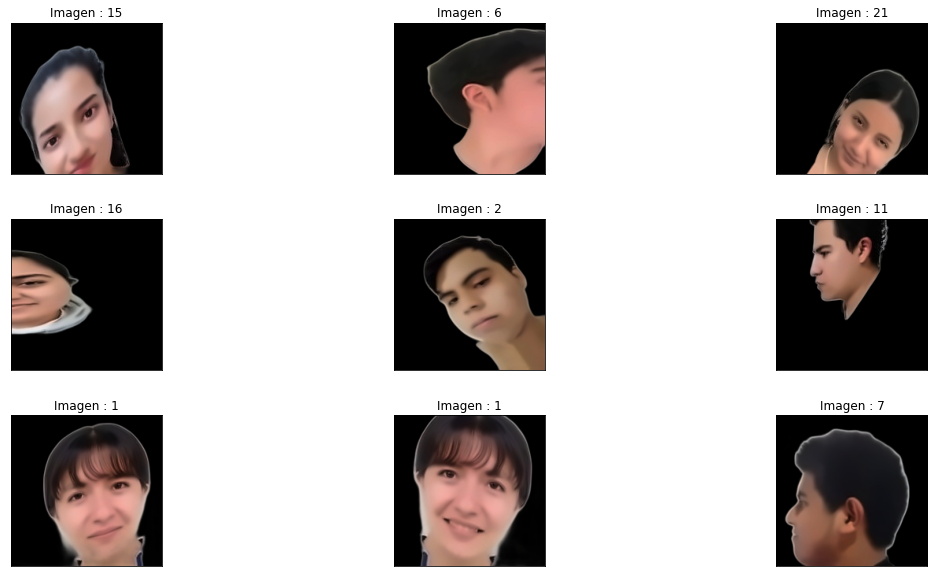

In [23]:
 """
    Este método permite mostrar imagenes de forma aleatoria.

    Parametros
    -----------
        images []: Lista de imagenes cargadas.
        labels []: Lista de etiquétas.
"""
def display_rand_images(images, labels):
    # Definimos la escala de las figuras
    plt.figure(1 , figsize = (19 , 10))
    # Inicializamos un contador
    n = 0 
    # Bucle que recorre 9 veces
    for i in range(9):
        # Incremento del contador
        n += 1 
        # Obtenemos un numero aleatorio
        r = np.random.randint(0 , images.shape[0] , 1)
        # Establecemos la forma de presentar las imagenes
        plt.subplot(3 , 3 , n)
        # Ajustamos la forma de mostrar las imagenes
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        # Mostramos las imagenes
        plt.imshow(images[r[0]])
        # Definimos la etiqueta de las imagenes
        plt.title('Imagen : {}'.format(labels[r[0]]))
        # Establecemos la medida x
        plt.xticks([])
        # Establecemos la medida y
        plt.yticks([])
    #Mostramos la gráfica generada
    plt.show()
    
# LLamamos al metodo para mostrar las imagenes
display_rand_images(images, labels)

Despues realizar la clasificación de las imagenes asignandole un label podemos distinguir que se han asignado de la siguiente manera:

Ariel Chabla = 0 <br>
Arrobo Mercy = 1 <br>
Barragan Steven = 2 <br>
Cevallos Joan = 3 <br>
Enriquez Selena = 4 <br>
Genesis Heredia = 5 <br>
Goyes Anthony = 6 <br>
HectorCedenio = 7 <br>
Jhon Zambrano = 8 <br>
Jordan Espinosa = 9 <br>
Jorge Borrero = 10 <br>
Jose Ruiz = 11 <br>
Lucio Carlos = 12 <br>
Masache Fernando = 13 <br>
Melany Lopez = 14 <br>
Mosquera Lucy = 15 <br>
Nataly Acosta = 16 <br>
Olalla Luis = 17 <br>
Parraga Maria Jose = 18 <br>
Paute Kevin = 19 <br>
Raymond Davila = 20 <br>
Rivas Selena = 21 <br>
Salazar Johana = 22 <br>
Solano Wilmer = 23 <br>
Solorzano Brian = 24 <br>
Vinicio Borja = 25

## Preparación de la Data para el entrenamiento del modelo CNN

In [24]:
#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
# Mostramos los valores
print("'n' Valores antes de reorganizarlos = ",n)

# llamamos a la función random_seed
np.random.seed(random_seed)
#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.shuffle(n)
# Mostramos los valores despues de reorganizarlos 
print("\n'n' Valores después de reorganizarlos = ",n)

'n' Valores antes de reorganizarlos =  [   0    1    2 ... 2489 2490 2491]

'n' Valores después de reorganizarlos =  [ 121   53 1508 ...  501  348  382]


In [25]:
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de imagenes
images = images[n]
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de etiquetas
labels = labels[n]
# Impromimos los detalles de ambas listas
print("Forma de las imágenes después de barajar = ",images.shape,"\nForma de las etiquetas después de barajar = ",labels.shape)

Forma de las imágenes después de barajar =  (2492, 192, 192, 3) 
Forma de las etiquetas después de barajar =  (2492,)


In [26]:
# Cambiamos el formato de las imagenes
images = images.astype(np.float32)
# Cambiamos el formato de las etiquetas
labels = labels.astype(np.int32)
# Dividimos el valor de las imagenes para 255
images = images/255
# Mostramos el valor de las imagenes después de normalizarlas
print("Forma de las imágenes después de normalizarlas = ",images.shape)

Forma de las imágenes después de normalizarlas =  (2492, 192, 192, 3)


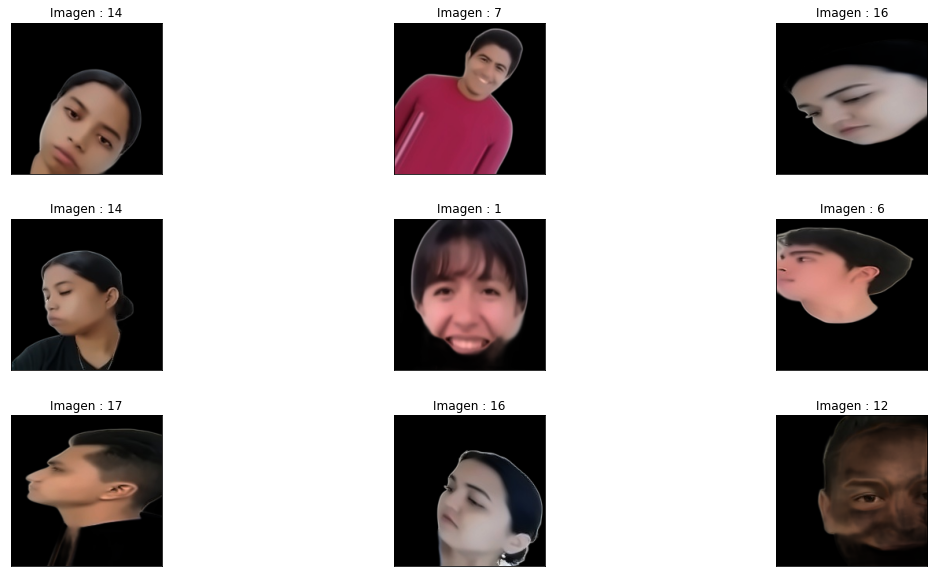

In [28]:
# Mostramos las imagenes de manera aleatoria
display_rand_images(images, labels)

Ahora que las imagenes han sido normalizadas se ha cambia el rango de valores de intensidad de píxeles. Para evitar imagenes con poco contraste debido al deslumbramiento, por ejemplo.

## División del dataset en datos de entrenamiento y datos de test

In [49]:
# Definimos los datos de entrenamiento y prueba
X_train, X_test, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
# Mostramos la forma de las imágenes de entrenamiento
print("train_ds shape = ",X_train.shape)
# Mostramos la forma de las etiquetas de entrenamiento
print("train_labels shape = ",train_labels.shape)
# Mostramos la forma de las imágenes de prueba
print("\ntest_ds shape = ",X_test.shape)
# Mostramos la forma de las etiquetas de prueba
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (1993, 192, 192, 3)
train_labels shape =  (1993,)

test_ds shape =  (499, 192, 192, 3)
test_labels shape =  (499,)


In [50]:
## Redimencionamos las imagenes de entrenamiento
X_train = tf.image.resize(X_train, (227, 227))
## Redimencionamos las imagenes de prueba
X_test = tf.image.resize(X_test, (227, 227))

## Early Stooping

In [51]:
# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

## PCA

In [ ]:
# Asignamos el numero de componentes
pca = PCA(n_components = 19)
# Entrenamos el modelo pca
pca.fit(X_train)
# Almacenamos los nuevos valores de entrenamiento de x
X_train_transformed = pca.transform(X_train)
# Almacenamos los nuevos valores de prueba de x
X_test_transformed = pca.transform(X_test)
# Nostramos el tamaño de los datos
print(X_train_transformed.shape, X_test_transformed.shape)

In [ ]:
# Asignamos  titulo a la figura
plt.legend('')
# Asignamos la legenda de X
plt.xlabel('Componentes Principales')
# Asignamos la legenda de Y
plt.ylabel('Varianza')
# Graficamos el diagrama de barras
plt.bar(list(range(1, X_train_transformed.shape[1]+1)),pca.explained_variance_ratio_)

# Modelo AlexNet CNN
## Definición de las capas AlexNET CNN

In [52]:
# Instanciamos el modelo
model=Sequential()

#Agregamos la primera capa convolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la segunda capa convolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la segunda capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la tercera capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa convolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

# Redimencionamos el modelo
model.add(Flatten())

#Añadimos la primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la tercera capa de densidad
model.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Capa de salida
model.add(Dense(26,activation="softmax"))
# Resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                      

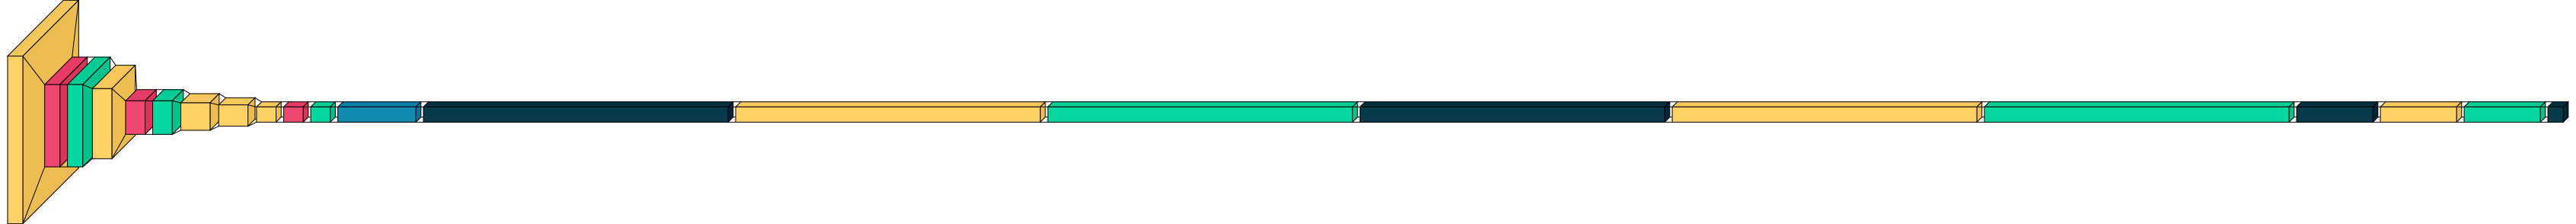

In [53]:
# Grafica del modelo generado
visualkeras.layered_view(model)

Observamos la distribución de las capas que conforman el modelo CNN planteado.<br>
Las capas convolucionales estan representadas por el color amarillo <br>
Las capas max pooling estan representadas por el color fuxia<br>
El proceso de normalización esta representado por el turqueza<br>
La capas de densidad se encuentran representadas por el color azul<br>
El proceso de regularización dropout se representa por el colo azul marino<br>

## Compilación del modelo CNN

In [54]:
# Compilamos el modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Grid Search

In [ ]:
# Definimos el tamaño del lote
batch_size = [10, 20, 40, 60, 80, 100]
# Definimos los parametros de para grid search
epochs = [10, 50, 100]
# Asignamos los parametros
param_grid = dict(batch_size=batch_size, epochs=epochs)
# Asignamos los parametros de ejecución de grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# Entrenamos grid con los datos de entrenamiento
grid_result = grid.fit(X_train, train_labels)

#Imprimimos un resumen de los resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Recorremos las metricas obtenidas
for mean, stdev, param in zip(means, stds, params):
    # Imprimimos las metricas para las distintas evaluaciones
    print("%f (%f) with: %r" % (mean, stdev, param))

## Entrenamiento del modelo

In [55]:
#Marca de tiempo
%time
# Entrenamiento del modelo
history = model.fit(X_train, train_labels, epochs=30, validation_split=0.2, callbacks= [es])

Wall time: 0 ns
Epoch 1/30
50/50 [==============================] - 187s 4s/step - loss: 3.5715 - accuracy: 0.1154 - val_loss: 95.7633 - val_accuracy: 0.0376
Epoch 2/30
50/50 [==============================] - 183s 4s/step - loss: 3.0893 - accuracy: 0.1493 - val_loss: 3.5250 - val_accuracy: 0.1153
Epoch 3/30
50/50 [==============================] - 181s 4s/step - loss: 2.8967 - accuracy: 0.1813 - val_loss: 5.1587 - val_accuracy: 0.0551
Epoch 4/30
50/50 [==============================] - 179s 4s/step - loss: 2.5739 - accuracy: 0.2491 - val_loss: 6.2549 - val_accuracy: 0.1278
Epoch 5/30
50/50 [==============================] - 171s 3s/step - loss: 2.4373 - accuracy: 0.2735 - val_loss: 2.4827 - val_accuracy: 0.2531
Epoch 6/30
50/50 [==============================] - 163s 3s/step - loss: 2.2094 - accuracy: 0.3306 - val_loss: 4.6491 - val_accuracy: 0.1353
Epoch 7/30
50/50 [==============================] - 162s 3s/step - loss: 2.1120 - accuracy: 0.3494 - val_loss: 21.2811 - val_accuracy: 0.

## Exportación del modelo entrenado

In [56]:
# almacenamos el modelo
convert = tf.lite.TFLiteConverter.from_keras_model(model)
# Convertimos el modelo a tflite
tflite_model = convert.convert()

# Generamos el archivo del modelo
with open("model_v4.tflite", 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\steve\AppData\Local\Temp\tmpw5y3hn0d\assets


INFO:tensorflow:Assets written to: C:\Users\steve\AppData\Local\Temp\tmpw5y3hn0d\assets


## Evaluación del modelo

In [57]:
# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

16/16 [==============================] - 14s 847ms/step - loss: 4.3946 - accuracy: 0.3026
4.394608020782471 0.30260521173477173


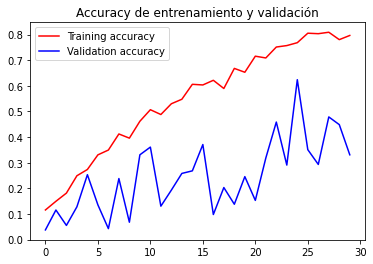

<Figure size 432x288 with 0 Axes>

In [58]:
# Obtenemos el accuracy del modelo
accuracy = history.history['accuracy']
# Obtenemos el accuracy de validación
validation_accuracy = history.history['val_accuracy']
# Determinamos los puntos de graficación
epochs = range(len(accuracy))
# Graficamos la metrica del accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# Graficamos la metrica del accuracy de validación
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
# Asignamos el titulo del gráfico
plt.title('Accuracy de entrenamiento y validación')
# Asignamos la legenda del grafico
plt.legend(loc=0)
# Creamos la figura
plt.figure()
# Mostramos la figura
plt.show()

## Predicción mediante el modelo entrenado

In [59]:
# Enviamos los datos de predicción
pred = model.predict(X_test)
# Tamaño de las predicciones
pred.shape

16/16 [==============================] - 13s 801ms/step


(499, 26)

IndexError: index 533 is out of bounds for axis 0 with size 499

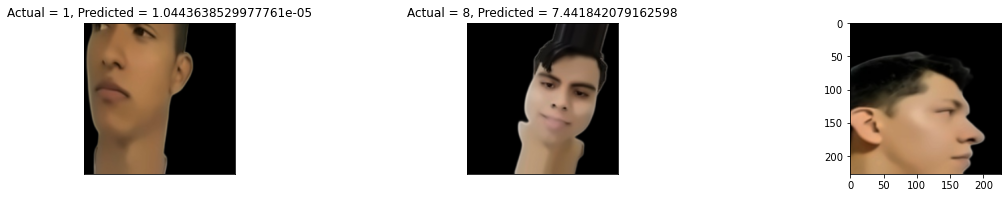

In [61]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

## Análisis de resultados

El proceso de entrenamiento requirio una cantidad de tiempo relativamente largo alcanzando un tiempo de 4 horas. Mediante el entrenamiento con más de 2000 imagenes de 26 personas, obtuvimos un accurracy de ""%, siendo un resultado deseable para la clasificación de personas a través del rostro, como se ve reflejado durante las pruebas realizadas con más de 500 images.